# NLP Intro Workshop Notebook by Dev Sharma

In [1]:
%matplotlib inline
from IPython.display import Image
import pandas as pd
import numpy as np
import nltk

# Regular Expressions

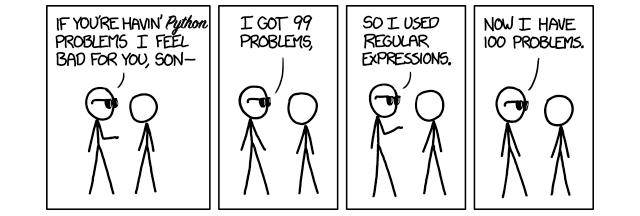

In [2]:
Image("images/reg_funny.png")

https://regexr.com/

* Pattern matching language
* [abc] = a,b or c. [0-9]{n} = n of any # from 0 to 9
    * [^abc] = not a b or c
* \w = all alphanumeric. \d = all digits or [0-9]. \s = space, line, tab, return.  "." = any character
    * capital variations of these mean the opposite e.g. \W = not \w
    * \* = zero or more repetitions. + = one or more reps. ? = optional
    * you can also add these after square brackets to apply one of these on that section e.g. [abc]? means one or none of a, b or c
* escape sequence (\) allows us to use "." as a literal character e.g. "\." (as opposes to a meta character src)
* () - parentheses capture groups. you can also have sub groups
* (abc|def) = either abc or def (note: this does not mean a, b or c OR d, e or f)
* Python functions
    * findall (for indexing groups), match (returns None if no match), compile (used for storing patterns), split (used for splitting on a pattern)

In [3]:
num = '785-573-4764'

In [4]:
import re

In [5]:
pattern = re.compile("[\D]{0,1}(\d{3})[\D]{0,2}(\d{3})[\D]{0,1}(\d{4})")

In [6]:
re.findall(pattern,num)

[('785', '573', '4764')]

In [7]:
numbers_list = ['135-565-3938', '(456) 856 7504', '6578301028', '675 848 8635', '540.478.3856']

In [8]:
[re.findall(pattern,num) for num in numbers_list]

[[('135', '565', '3938')],
 [('456', '856', '7504')],
 [('657', '830', '1028')],
 [('675', '848', '8635')],
 [('540', '478', '3856')]]

### Using Airbnb data

In [9]:
airbnb = pd.read_csv("data/airbnb.csv")

In [10]:
airbnb["amenities"][10]

'{TV,Wifi,"Air conditioning",Kitchen,"Free parking on premises","Free street parking",Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in","Private entrance",Bathtub,"Hot water","Bed linens",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Oven,Stove,"BBQ grill","Patio or balcony","Garden or backyard","Luggage dropoff allowed","Long term stays allowed","Wide hallway clearance","Well-lit path to entrance",Other,"Handheld shower head"}'

In [11]:
# let's see if we can create a list of all the ameneties
re.split("[\W]+",airbnb["amenities"][10])

['',
 'TV',
 'Wifi',
 'Air',
 'conditioning',
 'Kitchen',
 'Free',
 'parking',
 'on',
 'premises',
 'Free',
 'street',
 'parking',
 'Heating',
 'Family',
 'kid',
 'friendly',
 'Washer',
 'Dryer',
 'Smoke',
 'detector',
 'Carbon',
 'monoxide',
 'detector',
 'First',
 'aid',
 'kit',
 'Fire',
 'extinguisher',
 'Essentials',
 'Shampoo',
 'Hangers',
 'Hair',
 'dryer',
 'Iron',
 'Laptop',
 'friendly',
 'workspace',
 'Self',
 'check',
 'in',
 'Private',
 'entrance',
 'Bathtub',
 'Hot',
 'water',
 'Bed',
 'linens',
 'Microwave',
 'Coffee',
 'maker',
 'Refrigerator',
 'Dishwasher',
 'Dishes',
 'and',
 'silverware',
 'Cooking',
 'basics',
 'Oven',
 'Stove',
 'BBQ',
 'grill',
 'Patio',
 'or',
 'balcony',
 'Garden',
 'or',
 'backyard',
 'Luggage',
 'dropoff',
 'allowed',
 'Long',
 'term',
 'stays',
 'allowed',
 'Wide',
 'hallway',
 'clearance',
 'Well',
 'lit',
 'path',
 'to',
 'entrance',
 'Other',
 'Handheld',
 'shower',
 'head',
 '']

In [12]:
# let's try that again
re.split("""['\{,"\}]+""",airbnb["amenities"][10])

['',
 'TV',
 'Wifi',
 'Air conditioning',
 'Kitchen',
 'Free parking on premises',
 'Free street parking',
 'Heating',
 'Family/kid friendly',
 'Washer',
 'Dryer',
 'Smoke detector',
 'Carbon monoxide detector',
 'First aid kit',
 'Fire extinguisher',
 'Essentials',
 'Shampoo',
 'Hangers',
 'Hair dryer',
 'Iron',
 'Laptop friendly workspace',
 'Self check-in',
 'Private entrance',
 'Bathtub',
 'Hot water',
 'Bed linens',
 'Microwave',
 'Coffee maker',
 'Refrigerator',
 'Dishwasher',
 'Dishes and silverware',
 'Cooking basics',
 'Oven',
 'Stove',
 'BBQ grill',
 'Patio or balcony',
 'Garden or backyard',
 'Luggage dropoff allowed',
 'Long term stays allowed',
 'Wide hallway clearance',
 'Well-lit path to entrance',
 'Other',
 'Handheld shower head',
 '']

Let's try some exercises https://regexone.com/

# Tokenization

Lemmatization or stemming is the process of converting words with the same stem into either an actual word or common word respectively  

## Lemmatization

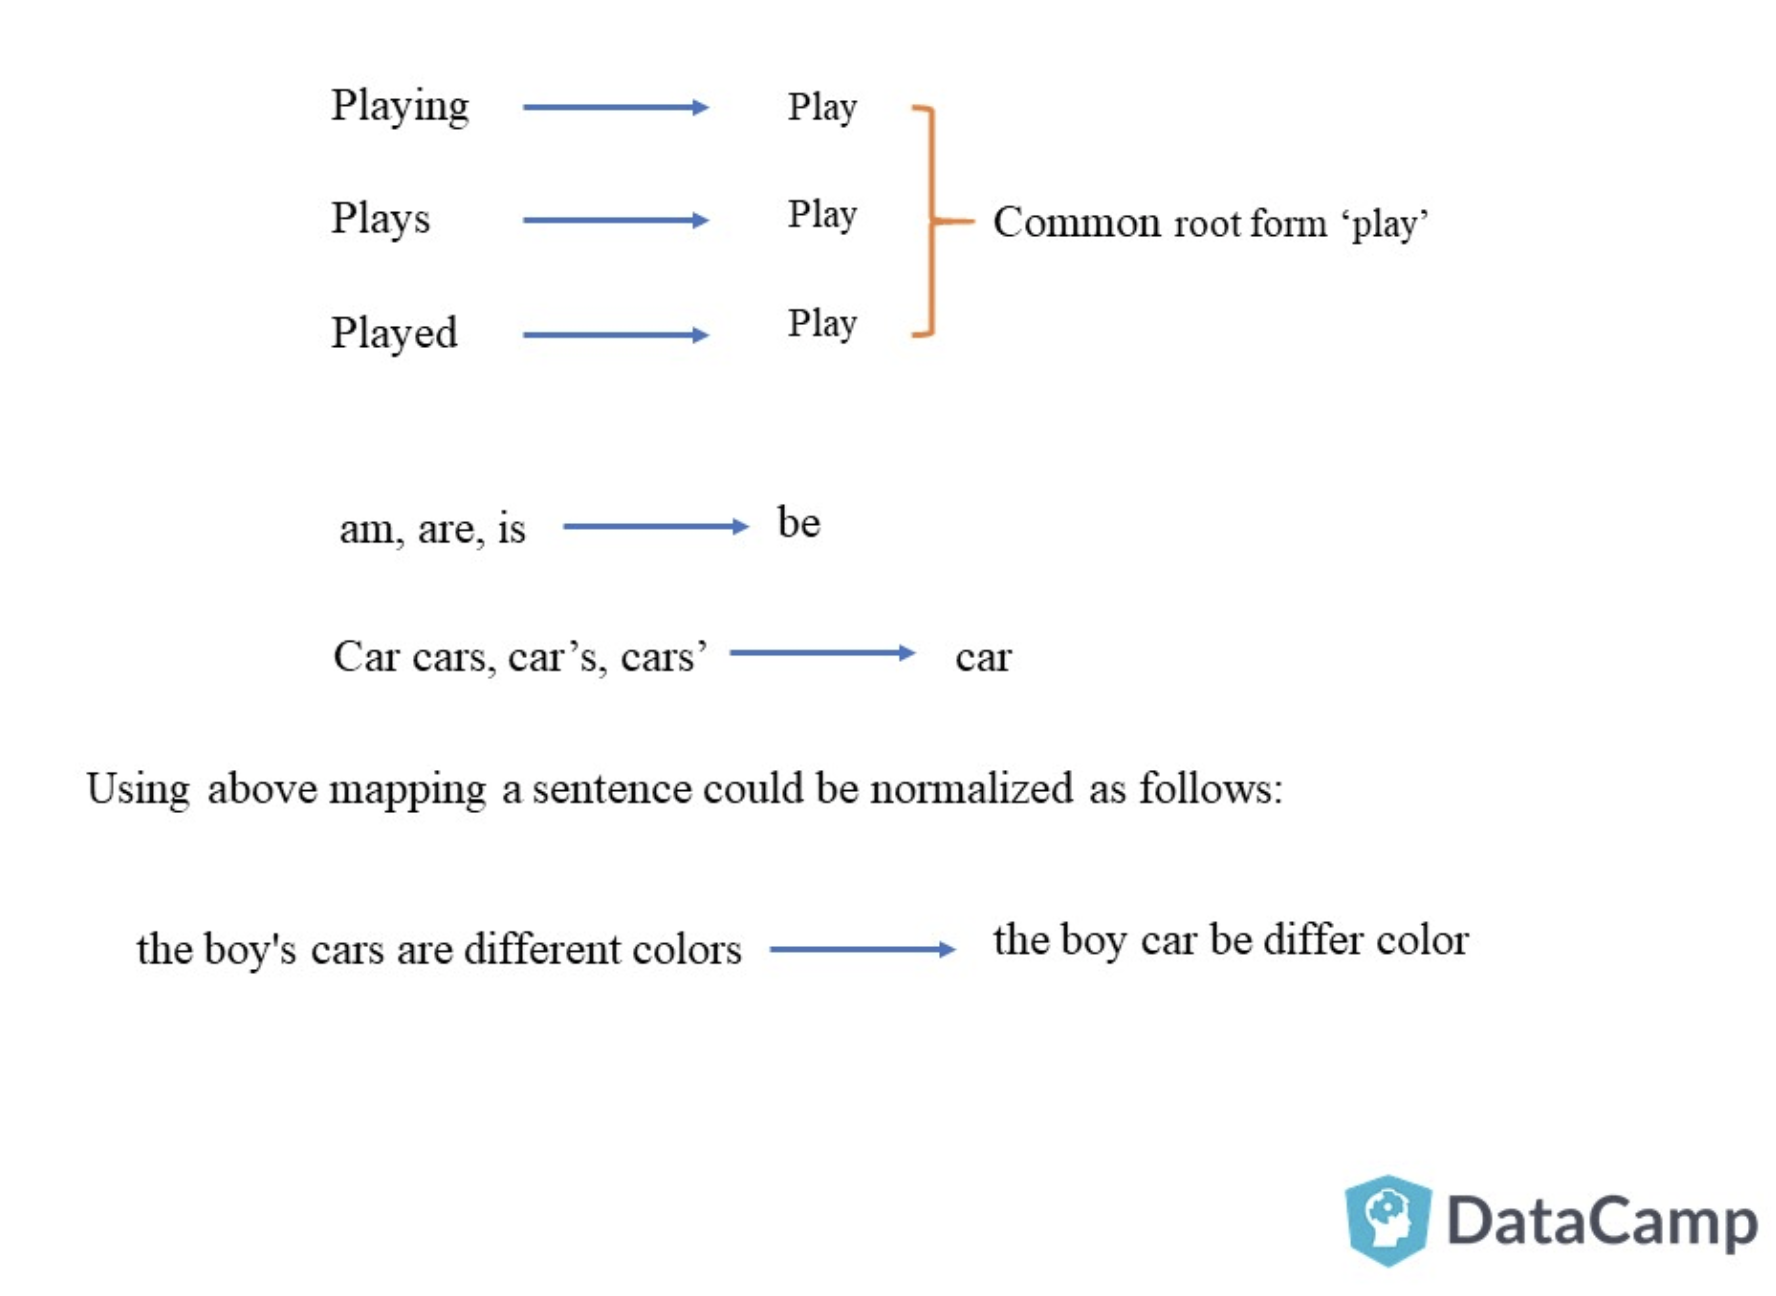

In [13]:
Image("images/lem.png")

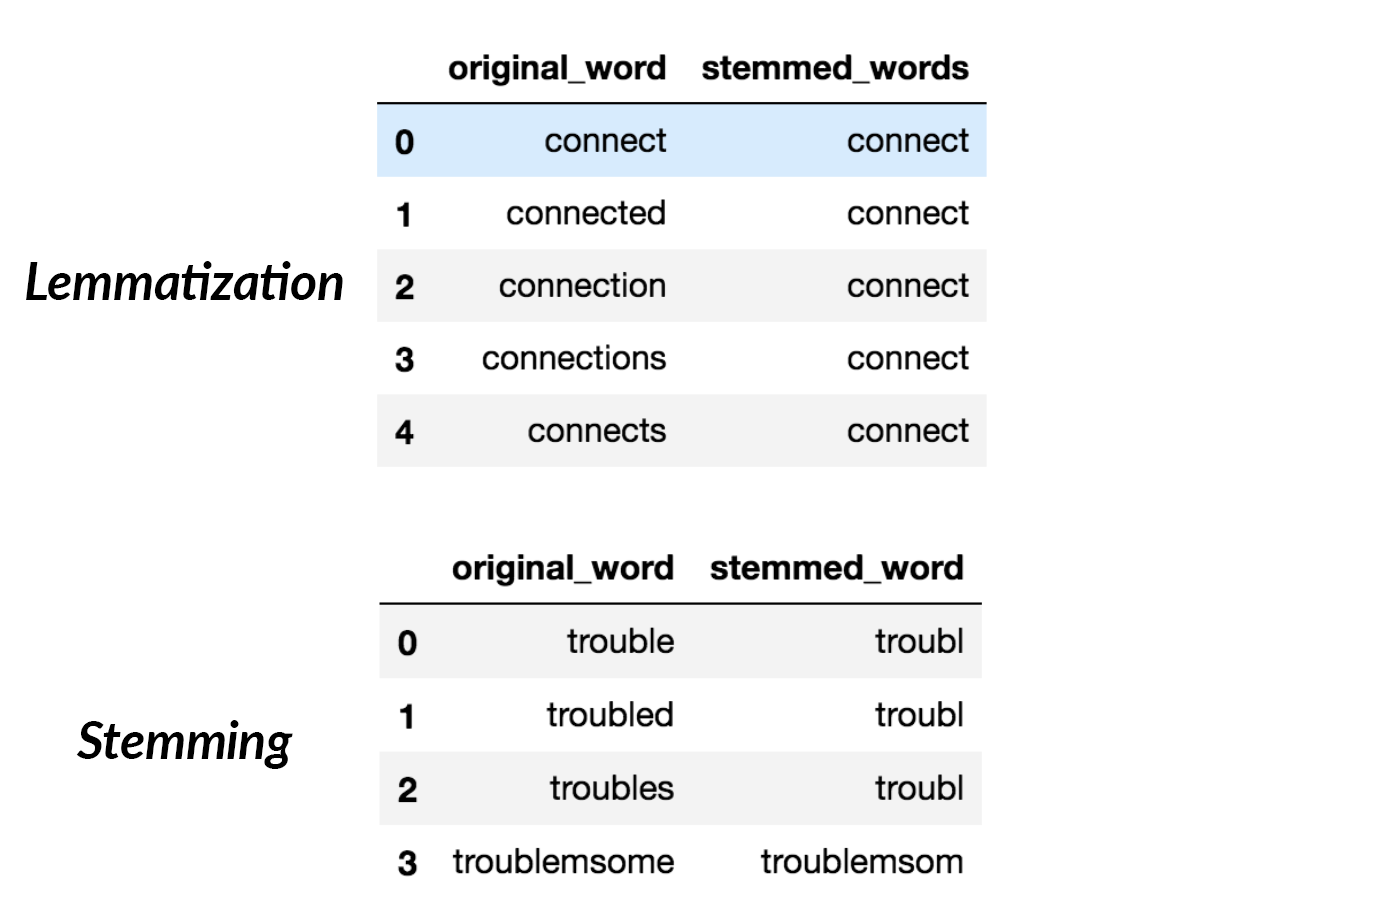

In [14]:
Image("images/stemming.png")

Both of these techniques are no longer recommended when working with a complex model.

Stop Words are words such as "is, the, then, are, we, etc." which are so common that they serve no value. Although they are traditionally taken out of a corpus, they are usually left in with today's more complex models. 

### Loading our data

In [15]:
# Loading medical review data
data = pd.read_csv("data/drug_reviews.tsv",delimiter="\t",index_col=0)

In [16]:
data.head()

,drugName,condition,review,rating,date,usefulCount
163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [17]:
data.shape

(53766, 6)

In [18]:
data["review"] = data["review"].apply(lambda x: x.replace("&#039;","'"))

In [19]:
data["review"]

163740    "I've tried a few antidepressants over the yea...
206473    "My son has Crohn's disease and has done very ...
159672                        "Quick reduction of symptoms"
39293     "Contrave combines drugs that were used for al...
97768     "I have been on this birth control for one cyc...
                                ...                        
159999    "I have taken Tamoxifen for 5 years. Side effe...
140714    "I've been taking Lexapro (escitaploprgram) si...
130945    "I'm married, 34 years old and I have no kids....
47656     "I was prescribed Nucynta for severe neck/shou...
113712                                        "It works!!!"
Name: review, Length: 53766, dtype: object

# Vectorization

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### Count Vectorization

Simple counts of each word in the each document

In [21]:
vectorizer = CountVectorizer(stop_words="english") # stop_words e.g. is, the, a, I, you

In [22]:
vectors = vectorizer.fit_transform(data["review"])

In [23]:
vocab = np.array(vectorizer.get_feature_names())

In [24]:
vocab[7000:7030]

array(['circulating', 'circulation', 'circulatory', 'circumcision',
       'circumference', 'circumstance', 'circumstances', 'circumstantial',
       'circus', 'cirgette', 'cirpo', 'cirpoflaxacin', 'cirpofloaxin',
       'cirpofloxacin', 'cirrhosis', 'cirrosis', 'cirvix', 'cisplatin',
       'cit', 'citalapram', 'citalipram', 'citaloplam', 'citalopram',
       'citaloptam', 'cities', 'citilapram', 'citilopram', 'citing',
       'citizen', 'citizens'], dtype='<U31')

In [25]:
vectors.shape, len(vocab)

((53766, 33323), 33323)

### SVD / PCA

In [26]:
top_words = 8

def show_topics(a):
    func = lambda x: [vocab[i] for i in np.argsort(x)[:-top_words-1:-1]]
    all_words = [func(i) for i in a]
    return [" ".join(i) for i in all_words]

#### Facevook Randomized Fast SVD

In [27]:
import fbpca

In [28]:
u, s, v = fbpca.pca(vectors, 10)

In [29]:
show_topics(v[:10])

['period day ve months days pill started just',
 'day pain taking feel like anxiety mg felt',
 'pain period days got cramps birth control bleeding',
 'day days period pill took got week hours',
 'taking started effects days months pill medication pain',
 'started weeks period feel anxiety got years ago',
 'feel like effects started week pain pill weight',
 'quot months effects week days ve anxiety weeks',
 'period anxiety medication took time effects sleep depression',
 'quot control birth sleep doctor month pill acne']

### With TF-IDF

TF-IDF or the Term Frequency - Inverse Document Frequency is a method of normalizing term-counts by accounting for how that term occurs within the document and the corpus as a whole
   * TF (the # of occurrences in a document / length of document) * IDF ( log(# of documents / # of documents with term in it)
   * Intuitively this makes sense because the more rare a term is within a single document, the higher the TF-IDF will be and vice versa. You can glance more at the intuition by experimenting with parameters here 
   * Note: this number can range from 0 to infinity
   
Now, let's try to calculate the TF-IDF for a single word in a single document comprised of 20 words out of a corpus of 100 documents.

In [30]:
# commonly occuring word in most documents(randomly picked numbers)
TF = (6/20)
IDF = np.log(100/95)

print(TF*IDF)

0.015387988316265144


In [31]:
# commonly occuring word in only one document(randomly picked numbers)
TF = (6/20)
IDF = np.log(100/1)

print(TF*IDF)

1.3815510557964275


In [32]:
# rarely occuring word in most documents (randomly picked numbers)
TF = (1/20)
IDF = np.log(100/98)

print(TF*IDF)

0.0010101353658759735


In [33]:
# rarely occuring word in only one document(randomly picked numbers)
TF = (1/20)
IDF = np.log(100/1)

print(TF*IDF)

0.2302585092994046


In [34]:
# extreme example 1:
TF = (20/20)
IDF = np.log(100/1)

print(TF*IDF) 

# why is this result so high?

4.605170185988092


In [35]:
# extreme example 2:
TF = (10/20)
IDF = np.log(100/100)

print(TF*IDF)

# why is this result so low?

0.0


### Back to Topic Modeling

In [36]:
vectorizer_tfidf = TfidfVectorizer(stop_words="english")

In [37]:
vectors_tfidf = vectorizer_tfidf.fit_transform(data["review"])

In [38]:
u, s, v = fbpca.pca(vectors_tfidf, 10)

In [39]:
show_topics(v[:10])

['pain sleep medicine works medication anxiety mg drug',
 'pain relief cramps period acne painful bleeding skin',
 'day pain took days felt pill feel hours',
 'works great period took sleep pill hours anxiety',
 'amp quot skin weeks good took like got',
 'anxiety life medicine period panic years attacks depression',
 'works ve skin started weeks months medicine pain',
 'quot life medicine great effects ve feel days',
 'medication effects drug weight anxiety feel don control',
 'pill bleeding feel effects time years far lost']

### NMF (Non-negative Matrix Factorization)

In [40]:
from sklearn import decomposition

In [41]:
clf = decomposition.NMF(n_components=10, random_state=1)

W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

In [42]:
show_topics(H1)

['day days feel like taking took just started',
 'period birth control bleeding periods months cramps got',
 'pain relief severe chronic years neck lower nerve',
 'anxiety depression life panic years medication attacks feel',
 'works great medicine effects really worked best wonders',
 'weight gain ve lost pounds gained lbs months',
 'acne skin face using clear ve months cleared',
 'sleep night hours asleep wake ambien morning insomnia',
 'quot amp doctor normal like feel drug don',
 'pill taking took sex period pills hours plan']

# Sentiment Analysis

## Positives and Negatives

In [43]:
from fastai import *
from fastai.text import *
import sklearn.feature_extraction.text as sklearn_text

In [44]:
data_pn = data[["review","rating"]]

In [45]:
data_pn.head()

,review,rating
163740,"""I've tried a few antidepressants over the yea...",10.0
206473,"""My son has Crohn's disease and has done very ...",8.0
159672,"""Quick reduction of symptoms""",9.0
39293,"""Contrave combines drugs that were used for al...",9.0
97768,"""I have been on this birth control for one cyc...",9.0


In [46]:
data.shape, data_pn.shape

((53766, 6), (53766, 2))

In [47]:
data_pn = data_pn[(data_pn.rating>=7) | (data_pn.rating<=3)]

In [48]:
data_pn["rating"] = data_pn["rating"].apply(lambda x: "pos" if x >=7  else "neg")

In [49]:
data_pn.head()

,review,rating
163740,"""I've tried a few antidepressants over the yea...",pos
206473,"""My son has Crohn's disease and has done very ...",pos
159672,"""Quick reduction of symptoms""",pos
39293,"""Contrave combines drugs that were used for al...",pos
97768,"""I have been on this birth control for one cyc...",pos


In [50]:
# new shape
data_pn.shape

(47278, 2)

# Naive Bayes Classifier

## Complete Example

We define the **log-count ratio** $r$ for each word $f$:

$r = \log \frac{\text{ratio of feature $f$ in positive documents}}{\text{ratio of feature $f$ in negative documents}}$

where ratio of feature $f$ in positive documents is the number of times a positive document has the feature divided by the number of positive documents.

In [51]:
med_reviews = TextList.from_df(data_pn, cols="review").split_by_rand_pct(.2).label_from_df(cols="rating")

In [52]:
med_reviews.valid.x[0], med_reviews.valid.y[0]

(Text xxbos " i have been on and off xxmaj paxil xxup cr several times over the past 3 years . xxmaj it has been a life saver ! i am able to be myself and enjoy life everyday instead of focusing on my xxmaj anxiety . xxmaj the first few weeks can be a little challenging adjusting to the medicine but it is totally worth some nausea and sleeplessness . ",
 Category pos)

In [53]:
len(med_reviews.x), len(med_reviews.valid.x)

(37823, 9455)

In [54]:
med_reviews.y.classes

['neg', 'pos']

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
docs = med_reviews.x

In [57]:
data_words = [[docs.vocab.itos[o] for o in doc.data] for doc in  med_reviews.x]
valid_words = [[docs.vocab.itos[o] for o in doc.data] for doc in med_reviews.valid.x]

vectorizer = CountVectorizer(preprocessor=noop,tokenizer=noop) # vocabular step is very important
x = vectorizer.fit_transform(data_words)

x_val = vectorizer.transform(valid_words)

x.shape, x_val.shape

((37823, 14254), (9455, 14254))

In [58]:
y = med_reviews.y
y_val = med_reviews.valid.y.items
v = vectorizer.vocabulary_
positive = y.c2i['pos']
negative = y.c2i['neg']

For each word in our vocabulary, we are summing up how many positive reviews it is in, and how many negative reviews.

In [59]:
p1 = np.squeeze(np.asarray(x[y.items==positive].sum(0)))
p0 = np.squeeze(np.asarray(x[y.items==negative].sum(0)))

In [60]:
np.asarray(x[y.items==negative].sum(0))

array([[ 13, 497, 230,   4, ...,   0,   0,   0,   1]], dtype=int64)

In [61]:
np.asarray(x[y.items==positive].sum(0))

array([[   0, 1467,  797,    5, ...,    6,   18,    5,   17]], dtype=int64)

In [62]:
print(x.shape)

len(p1),len(p0)

(37823, 14254)


(14254, 14254)

In [63]:
pt1 = (y.items==positive).sum()
pt0 = (y.items==negative).sum()
pt1,pt0

(28395, 9428)

#### Most common words in pos and neg reviews

In [64]:
# most common words in negative reviews 
[vectorizer.get_feature_names()[i] for i in np.argsort(p0)[:-20:-1]]

['.',
 'i',
 'xxmaj',
 ',',
 'and',
 'the',
 '"',
 'to',
 'it',
 'my',
 'a',
 'was',
 'for',
 'this',
 'of',
 'xxbos',
 'have',
 'on',
 'xxup']

In [65]:
# most common words in negative reviews 
[vectorizer.get_feature_names()[i] for i in np.argsort(p1)[:-20:-1]]

['.',
 'i',
 'xxmaj',
 'and',
 ',',
 'the',
 '"',
 'to',
 'it',
 'a',
 'my',
 'for',
 'have',
 'was',
 'of',
 'xxbos',
 'on',
 'in',
 'but']

### Using our ratios for even more data exploration

We can use p0 and p1 to do some more data exploration!

#### Answer:

In [66]:
def word_check(word):
    return {"pos":p1[v[word]],"neg":p0[v[word]]}

In [67]:
# How often does the word "loved" appear in neg vs. pos reviews?
word_check("loved")

{'pos': 317, 'neg': 92}

In [68]:
# How often does the word "hated" appear in neg vs. pos reviews?
word_check("hated")

{'pos': 129, 'neg': 61}

In [69]:
# worst
word_check("worst")

{'pos': 686, 'neg': 1018}

#### positive reviews with the word "worst"

I was curious to look at an example of a postive review with the word "worst" in it:

In [70]:
v['worst']

14025

In [71]:
np.argwhere(x[:,13970] > 0)[:,0]

array([ 8711, 16734, 27712], dtype=int32)

In [72]:
a = np.argwhere((x[:,13970] > 0))[:,0]; a

array([ 8711, 16734, 27712], dtype=int32)

In [73]:
b = np.argwhere(y.items==positive)[:,0]; b

array([    0,     1,     2,     3, ..., 37819, 37820, 37821, 37822])

In [74]:
set(a).intersection(set(b))

{8711, 16734, 27712}

In [75]:
review = med_reviews.x[73]
review.text

'xxbos " i will say this about the patch . xxmaj it work for me . xxmaj we \'re there side effects ? yes . a small bit of bruising and a small rash . i was willing to put up with those side effects because i did not have one craving for a cigarette . i was very happy with the program and have remained smoke free for three years boxing day passed . "'

# Modeling

In [76]:
pr1 = p1+1/pt1+1
pr0 = p0+1/pt0+1

We define the **log-count ratio** $r$ for each word $f$:

$r = \log \frac{\text{ratio of feature $f$ in positive documents}}{\text{ratio of feature $f$ in negative documents}}$

where ratio of feature $f$ in positive documents is the number of times a positive document has the feature divided by the number of positive documents.

In [77]:
r = np.log(pr1/pr0)

In [78]:
preds = x_val @ r + np.log(pt1/pt0) > 0

In [79]:
(y_val==preds).mean()

0.7451084082496033

### Vocab most likely associated with positive/negative reviews

In [80]:
biggest = np.argpartition(r, -10)[-10:]
smallest = np.argpartition(r, 10)[:10]

Most positive words:

In [81]:
[vectorizer.get_feature_names()[k] for k in biggest] # positive

['smoked',
 'shirts',
 'presentation',
 'goal',
 'blessing',
 'saved',
 'lifesaver',
 'cd4',
 'saver',
 'changer']

In [82]:
np.argmax(x[:,v['undetectable']])

14230

In [83]:
# example with the word "undectable"
med_reviews.x[3870]

Text xxbos " xxmaj end of week 4 and mild side effects like fatigue and stomach cramps . xxmaj diarrhea subsided also , i feel pretty good but couple days out the week it feels like my heart is beating slow and i feel light headed , nauseous , headache and whole body ache . "

Most negative words:

In [84]:
[vectorizer.get_feature_names()[k] for k in smallest] # most negative

['scam',
 'fluttering',
 'refund',
 'fluoroquinolone',
 '\t',
 'lastacaft',
 'crotch',
 'bellafill',
 'poisoned',
 'rhofade']

In [85]:
np.argmax(x[:,v['scam']])

36968

In [86]:
med_reviews.x[36988]

Text xxbos " i love trazadone . i have always had a problem with anxiety and problems sleeping . xxmaj my xxup pa put me on 50 mg at least a year ago . xxmaj it was a miracle . i 'm able to fall asleep and xxup stay asleep . xxmaj something i have struggled with all my life . i 'm also a very light sleeper . xxmaj but the real miracle came when it helped with my anxiety / depression . i 'm a new person . i just recently asked for an increase . xxmaj my xxup pa was surprised i had n't asked earlier . xxmaj she upped the dose to 100 mg and i sleep like a baby . xxmaj it 's been a wonder drug for me . "

## Binary Naive Bayes Classifier

Maybe it only matters whether a word is in the review or not (not the frequency of the word):

In [87]:
x=x.sign()

In [88]:
# we no longer have counts
x.todense()[:10,:10]

matrix([[0, 0, 0, 0, ..., 0, 0, 1, 0],
        [0, 0, 0, 0, ..., 0, 0, 1, 0],
        [0, 0, 0, 0, ..., 0, 0, 1, 0],
        [0, 0, 0, 0, ..., 0, 0, 1, 0],
        ...,
        [0, 0, 0, 0, ..., 0, 0, 1, 0],
        [0, 0, 0, 0, ..., 0, 0, 1, 0],
        [0, 0, 0, 0, ..., 0, 0, 1, 0],
        [0, 0, 0, 0, ..., 0, 0, 1, 0]])

In [89]:
negative = y.c2i['neg']
positive = y.c2i['pos']

In [90]:
p1 = np.squeeze(np.asarray(x[y.items==positive].sum(0)))
p0 = np.squeeze(np.asarray(x[y.items==negative].sum(0)))

In [91]:
pr1 = (p1+1) / ((y.items==positive).sum() + 1)
pr0 = (p0+1) / ((y.items==negative).sum() + 1)

In [92]:
r = np.log(pr1/pr0)
b = np.log((y.items==positive).mean() / (y.items==negative).mean())

preds = (x_val.sign() @ r + b) > 0

In [93]:
(preds==y_val).mean()

0.849497620306716

## Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
m = LogisticRegression(C=0.1,dual=True)
m.fit(x,y.items.astype(int))

/anaconda3/envs/fastai/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=True, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
preds = m.predict(x_val)
(preds==y_val).mean()

0.8632469592808039

## Binarized Logistic Regression

In [97]:
m = LogisticRegression(C=0.1, dual=True)
m.fit(x.sign(), y.items.astype(int))

LogisticRegression(C=0.1, class_weight=None, dual=True, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
preds = m.predict(x_val.sign())
(preds==y_val).mean()

0.8728714965626653

# Word2Vec Example

* In a Word2Vec Neural Network, the sole middle layer (of activations) are the embeddings for a word or set of words
    * https://www.youtube.com/watch?v=5PL0TmQhItY&feature=youtu.be&t=393
    * Continuous Bag of Words and Skip-Gram are the two NN approaches for W2V. They are sort of opposite of each where in CBOW, we input a word or group of words to predict other words likely to show up in the same context. In Skip-gram, we instead predict the words based on an input context src (this apparently helps rarer words) e.g. FastText from FB used CBOW

source 1: https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/

source 2: https://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/

In [99]:
import gensim 
from gensim.models import Word2Vec 

In [100]:
# let's use our previously tokenized reviews
data_words[0:5]

[['xxbos',
  '"',
  'i',
  "'ve",
  'tried',
  'a',
  'few',
  'antidepressants',
  'over',
  'the',
  'years',
  '(',
  'citalopram',
  ',',
  'fluoxetine',
  ',',
  'amitriptyline',
  ')',
  ',',
  'but',
  'none',
  'of',
  'those',
  'helped',
  'with',
  'my',
  'depression',
  ',',
  'insomnia',
  '&',
  '&',
  'anxiety',
  '.',
  'xxmaj',
  'my',
  'doctor',
  'suggested',
  'and',
  'changed',
  'me',
  'onto',
  '45',
  'mg',
  'mirtazapine',
  'and',
  'this',
  'medicine',
  'has',
  'saved',
  'my',
  'life',
  '.',
  'xxmaj',
  'thankfully',
  'i',
  'have',
  'had',
  'no',
  'side',
  'effects',
  'especially',
  'the',
  'most',
  'common',
  '-',
  'weight',
  'gain',
  ',',
  'i',
  "'ve",
  'actually',
  'lost',
  'alot',
  'of',
  'weight',
  '.',
  'i',
  'still',
  'have',
  'suicidal',
  'thoughts',
  'but',
  'mirtazapine',
  'has',
  'saved',
  'me',
  '.',
  '"'],
 ['xxbos',
  '"',
  'xxmaj',
  'my',
  'son',
  'has',
  'xxmaj',
  'crohn',
  "'s",
  'disease',

In [101]:
# Create CBOW model 
w2v_model = gensim.models.Word2Vec(data_words, min_count = 1,  
                              size = 100, window = 5) 

In [102]:
# check vocab with:
w2v_model.wv.vocab

{'xxbos': <gensim.models.keyedvectors.Vocab at 0x1a32cd0bd0>,
 '"': <gensim.models.keyedvectors.Vocab at 0x1a32cd0c50>,
 'i': <gensim.models.keyedvectors.Vocab at 0x1a32cd0190>,
 "'ve": <gensim.models.keyedvectors.Vocab at 0x1a32cd0cd0>,
 'tried': <gensim.models.keyedvectors.Vocab at 0x1a32cd0d50>,
 'a': <gensim.models.keyedvectors.Vocab at 0x1a32cd0dd0>,
 'few': <gensim.models.keyedvectors.Vocab at 0x1a32cd0f10>,
 'antidepressants': <gensim.models.keyedvectors.Vocab at 0x1a32cd0e50>,
 'over': <gensim.models.keyedvectors.Vocab at 0x1a32cd0e10>,
 'the': <gensim.models.keyedvectors.Vocab at 0x1a32cd0e90>,
 'years': <gensim.models.keyedvectors.Vocab at 0x1a32cd0fd0>,
 '(': <gensim.models.keyedvectors.Vocab at 0x1a32cd0ed0>,
 'citalopram': <gensim.models.keyedvectors.Vocab at 0x1a32cd0f50>,
 ',': <gensim.models.keyedvectors.Vocab at 0x1a32cd1090>,
 'fluoxetine': <gensim.models.keyedvectors.Vocab at 0x1a32cd1110>,
 'amitriptyline': <gensim.models.keyedvectors.Vocab at 0x1a32cd1050>,
 ')': <

In [103]:
w2v_model.wv.most_similar('helped')

[('helps', 0.7022157311439514),
 ('improved', 0.6645652055740356),
 ('helping', 0.6110638976097107),
 ('enabled', 0.5954971313476562),
 ('allowed', 0.5685466527938843),
 ('effected', 0.5682263374328613),
 ('worked', 0.5470329523086548),
 ('curbed', 0.543352484703064),
 ('caused', 0.5201596021652222),
 ('fixed', 0.5198962688446045)]

In [104]:
w2v_model.wv.most_similar('bad')

[('terrible', 0.7163674831390381),
 ('badly', 0.6970840692520142),
 ('horrible', 0.6701754331588745),
 ('intense', 0.6576242446899414),
 ('scary', 0.6260762214660645),
 ('strong', 0.6202399730682373),
 ('unbearable', 0.6159080862998962),
 ('awful', 0.613357424736023),
 ('severe', 0.586459219455719),
 ('strange', 0.5747977495193481)]

In [105]:
w2v_model.wv.most_similar(negative='medicine')

[('seemed', 0.3050179183483124),
 ('liked', 0.2899920344352722),
 ('helped', 0.28747689723968506),
 ('gives', 0.2718510329723358),
 ('decreases', 0.25971919298171997),
 ('helps', 0.24416279792785645),
 ('erased', 0.23638808727264404),
 ('keeps', 0.2352573424577713),
 ('does', 0.23311448097229004),
 ('kept', 0.230960875749588)]

# Recurrent Neural Networks

RNNs: https://towardsdatascience.com/illustrated-guide-to-recurrent-neural-networks-79e5eb8049c9

Example sequence "One, two, three, four"

### RNN Architecture

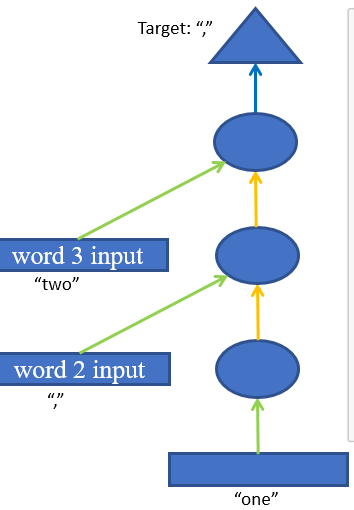

In [106]:
Image("images/rnn.png") # credit: Fast.ai

* Weights for each batch are added to the hidden state. Similarly, embeddings across multiple word inputs are updated and shared across all batches as well. good walk-through can be found here and here
* If we have a sequence of 70 words, then the first word is used to predict the second word. 1st and 2nd for the third. 1st, 2nd, 3rd for the 4th. And so on.

#### Possible interiew question What is the key problem with RNNs?
* Vanishing Gradient Problem

LSTMs and GRU: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

# Transformers

Machine Translation is the task of translating text from one human language to another human language

Comparison of Transformer Accuracy for Machine Translation compared to other techniques

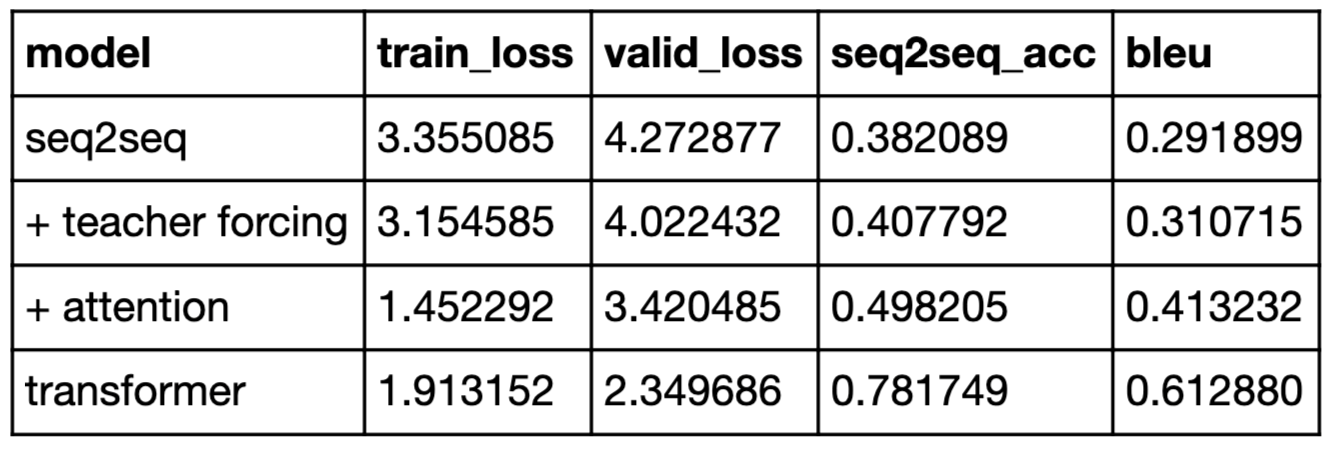

In [107]:
Image('images/comparison.png')

Seq2Seq uses RNNs. Transformers do not. 

Illustrated Transformer: http://jalammar.github.io/illustrated-transformer/

The core component of Transformers is Attention: [Example](http://jalammar.github.io/images/t/transformer_self-attention_visualization.png)

## Transfer Learning 

BERT, XLNet, ELmO, RoBERTa are all transformer architectures which have achieved a lot of success in various NLP tasks.

### GLUE Benchmark

https://super.gluebenchmark.com/leaderboard

# Data Ethics in NLP

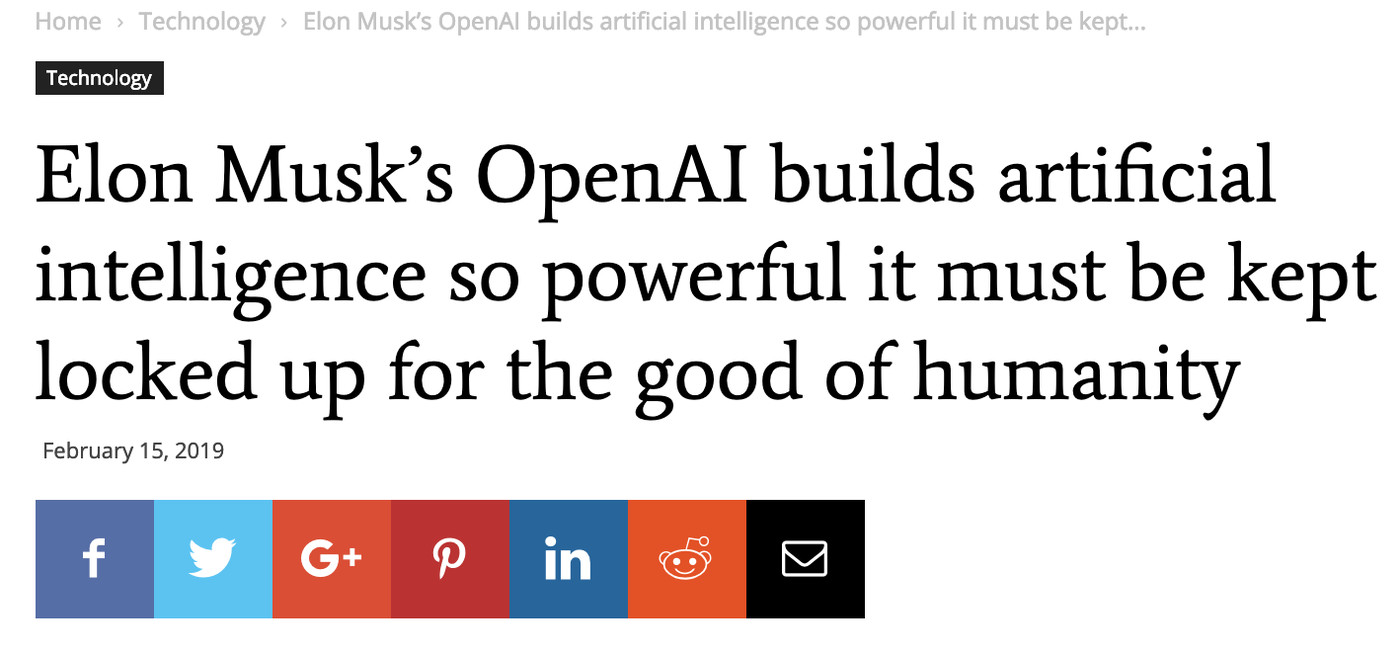

In [108]:
Image("images/headline1.jpg")